In [1]:
#imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os
import feather
import datetime

from  ema_workbench.analysis  import prim
from ema_workbench import util
from ema_workbench import (load_results, ema_logging)
ema_logging.log_to_stderr(ema_logging.INFO)

from IPython.core import display as ICD
import mpld3
%matplotlib notebook

C:\Users\Patrick\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:29: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\Patrick\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
print("loading results...")
file_name = r'.\Data\Results 2000 climate_policies_v3_1.tar.gz'
results = util.load_results(file_name)
experiments,outcomes=results
print("results loaded.")

loading results...


[MainProcess/INFO] results loaded succesfully from C:\Users\Patrick\Documents\GitHub\BBSD\ShaleGas\Data\Results 2000 climate_policies_v3_1.tar.gz


results loaded.


In [3]:
#test outcomes
experiments

array([(0.03834361, 0.04751067, 0.00223591, 0.02533312, 0.03533434, 0.02698676, 0.01710869, 0.01052414, 0.00421354, 0.55826208, 547.63488187, 184.27312965, 36.01263874, 0.11318786, 9.38592541, 0.03058281, 0.01113132, 0.06507631, 100.79689494,  64.10141743, 0.32952839, 0.01093103, 0.00645319, 0.01179037, 0.01383535, 1, 3, 100,  4.72645609,  7.39868142, 5.90738072, 7.31948887, 18.95330434, 0.20038214, -0.1105384 , -0.17448416, 2, 1.60087216, -0.49581994, 0.36887233, 11520614.11967403, 3.5107279 ,  8.5272855 , 66379.52900355, 66.51194884, 7668028.58220784, 6582055.67162776, 14276073.01303373, 6763046.16192208, 0.91007333, 33062386.80765595, 22212825.77497096, 1.01664660e+08, 1.17201009e+08, 1.32214148e+08, 1.60867529e+08, 24845366.12906215, 71819531.03543478, 17909313.90863758, 27038250.77423465, 3387604.4622142 , 61104563.97661208, 19727631.94524611, 8042292.94162874, 88799644.64805326, 38581983.22497469, 10412.87788509, 24765.8322256 , 3009.22924508, 2575.95126561, 15920.60822357, 3707.

In [4]:
#import clustering solutions from R via Feather
clsol_path = r'C:\Users\Patrick\Documents\GitHub\BBSD\ShaleGas\Data\2018-07-12CID.feather'
df_clsol = feather.read_dataframe(clsol_path)
df_clsol.head()

,CID
0,1
1,2
2,3
3,2
4,4


In [5]:
#add binary column for PRIM
coloi = "CID" #column of interest
df_clsol['bin'] = np.where(df_clsol[coloi]==1, 1, 0)
df_clsol.head()

,CID,bin
0,1,1
1,2,0
2,3,0
3,2,0
4,4,0


[MainProcess/INFO] 2000 points remaining, containing 359 cases of interest
[MainProcess/INFO] mean: 0.9741379310344828, mass: 0.058, coverage: 0.3147632311977716, density: 0.9741379310344828 restricted_dimensions: 25


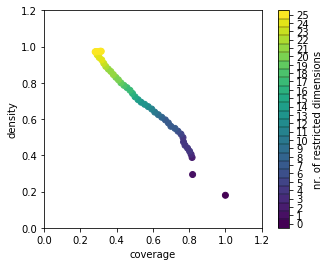

In [55]:
prim_alg = prim.Prim(experiments, np.where(df_clsol["CID"]==6, 1, 0), threshold=0.5) #rotate through for CID=1 or 2
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

	\item Switch prices or supply dominance in demand subtitution
	\item Initial unit costs oil	
	\item Effect of supply shortage on GDP growth	
	\item Switch legal emission cap	
	\item Average throughput time stocks

coverage    0.314763
density     0.974138
mass           0.058
mean        0.974138
res dim           25
Name: 51, dtype: object

                                                         box 51               \
                                                            min          max   
Switch prices or supply dominance in demand sub...          {2}          {2}   
Switch legal emission cap                             {1, 2, 3}    {1, 2, 3}   
Initial unit costs oil                                   1002.4      5819.06   
Delay time new capacity GE                              5.00092      17.7347   
Relative part emissions under CO2 cap NA               0.137685     0.499818   
Initial energy demand Am                            9.69837e+07  1.01687e+08   
Time for deteriation of unused capacity                 10.6849       29.999   
Effect of supply shortage on GDP growth               -0.281869   -0.0276917   
Effect of energy shortage on future decoupling        0.0153237     0.

TypeError: float() argument must be a string or a number, not 'set'

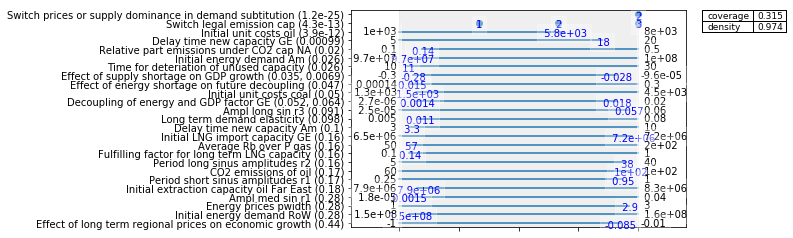

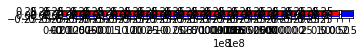

In [61]:
top_box = 51

box1.inspect(top_box)
box1.inspect(top_box, style='graph')

box1.select(top_box)
fig = box1.show_pairs_scatter()
fig.set_size_inches((8,8))
plt.show()
plt.close()